In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib inline

In [4]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
tree_loan_cols = ['Gender', 'Married', 'Education',
                  'Self_Employed','ApplicantIncome', 'LoanAmount','Property_Area', 'Loan_Status']
tree_loan = loan[tree_loan_cols]
tree_loan.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,NaN,Urban,Y
1,Male,Yes,Graduate,No,4583,128.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,66.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,120.0,Urban,Y
4,Male,No,Graduate,No,6000,141.0,Urban,Y


In [5]:
tree_loan.isna().sum().sort_values(ascending=False)

Self_Employed      32
LoanAmount         22
Gender             13
Married             3
Loan_Status         0
Property_Area       0
ApplicantIncome     0
Education           0
dtype: int64

In [6]:
#print rows with Nan
tree_loan[tree_loan.isnull().any(axis=1)]

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,NaN,Urban,Y
11,Male,Yes,Graduate,NaN,2500,109.0,Urban,Y
19,Male,Yes,Graduate,NaN,2600,115.0,Urban,Y
23,NaN,Yes,Not Graduate,No,3365,112.0,Rural,N
24,Male,Yes,Graduate,NaN,3717,151.0,Semiurban,N
...,...,...,...,...,...,...,...,...
588,NaN,No,Graduate,No,4750,94.0,Semiurban,Y
592,NaN,No,Graduate,Yes,9357,292.0,Semiurban,Y
600,Female,No,Graduate,NaN,416,350.0,Urban,N
601,Male,Yes,Not Graduate,NaN,2894,155.0,Rural,Y


In [7]:
idx_null = tree_loan[tree_loan["Self_Employed"].isnull()].index
dic = {"Graduate":"No", "Not Graduate": "Yes" }
tree_loan.loc[idx_null, 'Self_Employed'] = tree_loan.loc[idx_null, 'Education'].map(dic)

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))
tree_loan['LoanAmount'] = imputer.transform(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
tree_loan.dropna(how="any", axis=0, inplace=True)
tree_loan.isna().sum().sort_values(ascending=False)

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Loan_Status        0
Property_Area      0
LoanAmount         0
ApplicantIncome    0
Self_Employed      0
Education          0
Married            0
Gender             0
dtype: int64

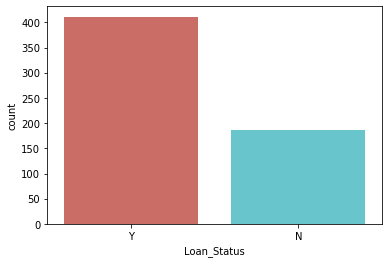

In [10]:
    target = tree_loan["Loan_Status"].value_counts()
    sns.countplot(tree_loan["Loan_Status"], palette='hls')

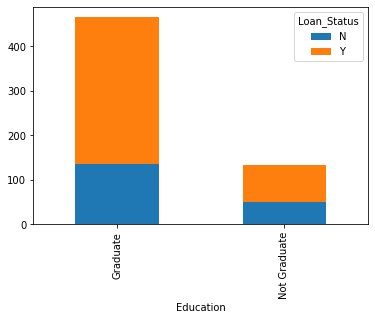

In [11]:
pd.crosstab(tree_loan.Education, tree_loan.Loan_Status).plot(kind="bar", stacked=True)

In [12]:
tree_loan.groupby(by='Loan_Status').count()

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area
Loan_Status,,,,,,,
N,187,187,187,187,187,187,187
Y,411,411,411,411,411,411,411


In [13]:
#encode = LabelEncoder()
#tree_loan.loc[:, 'Property_Area'] = encode.fit_transform(tree_loan['Property_Area']) #single col
tree_loan_encode = tree_loan.apply(LabelEncoder().fit_transform)  #multiple cols
tree_loan_encode.head() 

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,1,0,0,0,368,100,2,1
1,1,1,0,0,299,81,0,0
2,1,1,0,1,136,26,2,1
3,1,1,1,0,88,73,2,1
4,1,0,0,0,373,94,2,1


In [14]:
x_train = tree_loan_encode.loc[:, tree_loan.columns != "Loan_Status"]
y_train = tree_loan_encode.loc[:, tree_loan.columns == "Loan_Status"]
loan_test = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
loan_test = loan_test[tree_loan_cols]
loan_test.dropna(how="any", axis=0, inplace=True)
loan_test_encode = loan_test.apply(LabelEncoder().fit_transform)  #multiple cols
x_test = loan_test_encode.loc[:, loan_test.columns != "Loan_Status"]
y_test = loan_test_encode.loc[:, loan_test.columns == "Loan_Status"]

                 0  Chi Score       p-value
0           Gender   0.050072  8.229381e-01
1          Married   1.823438  1.769045e-01
2        Education   3.097553  7.841007e-02
3    Self_Employed   0.029716  8.631370e-01
4  ApplicantIncome  19.157433  1.203679e-05
5       LoanAmount  55.324280  1.021984e-13
6    Property_Area   0.287298  5.919573e-01


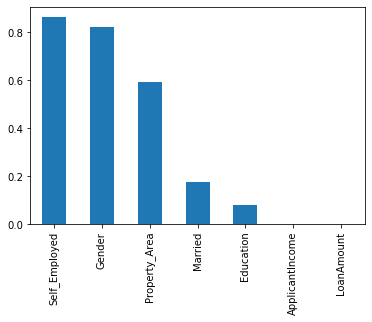

In [15]:
#chi square test for feature independence
from sklearn.feature_selection import chi2
chi_scores  = chi2(x_train, y_train)
chi_table = pd.DataFrame(x_train.columns)
chi_table['Chi Score'] = chi_scores[0]
chi_table['p-value'] = chi_scores[1]
print(chi_table)
p_values = pd.Series(chi_scores[1], index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [16]:
reg = LogisticRegression(solver='lbfgs', multi_class='auto')

In [17]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
rfe = RFE(reg, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
rfe_df = pd.DataFrame(x_train.columns)
rfe_df ["Support"] = pd.Series(rfe.support_)
rfe_df ["Ranking"] =  pd.Series(rfe.ranking_)
rfe_df
#remove features
#x_train = x_train[rfe_df[rfe_df['Support'] ==True][0]] 

,0,Support,Ranking
0,Gender,True,1
1,Married,True,1
2,Education,True,1
3,Self_Employed,True,1
4,ApplicantIncome,False,3
5,LoanAmount,False,2
6,Property_Area,True,1


In [20]:
reg.fit(x_train, np.ravel(y_train))
coeff = pd.DataFrame(x_train.columns)
coeff["Intercept"] = np.repeat(reg.intercept_, coeff.shape[0])
coeff["Coefficients"] = pd.Series(reg.coef_.ravel())
coeff['Odds'] = pd.Series(np.exp(reg.coef_.ravel()))
print("Score:", reg.score(x_train, y_train))
coeff

Score: 0.6872909698996655


,0,Intercept,Coefficients,Odds
0,Gender,0.934007,0.015688,1.015812
1,Married,0.934007,0.490820,1.633656
2,Education,0.934007,-0.488890,0.613307
3,Self_Employed,0.934007,0.052523,1.053926
4,ApplicantIncome,0.934007,0.000275,1.000275
5,LoanAmount,0.934007,-0.005313,0.994701
6,Property_Area,0.934007,0.037551,1.038265


In [21]:
y_pred = reg.predict(x_test)
pred_proba = reg.predict_proba(x_test)
pred_df = pd.DataFrame(pred_proba)
pred_df["Predictions"] = y_pred
pred_df

,0,1,Predictions
0,0.250234,0.749766,1
1,0.187024,0.812976,1
2,0.338148,0.661852,1
3,0.347153,0.652847,1
4,0.314391,0.685609,1
...,...,...,...
541,0.306594,0.693406,1
542,0.186698,0.813302,1
543,0.314510,0.685490,1
544,0.281705,0.718295,1


In [22]:
#The expit function, also known as the logistic sigmoid function, is defined as expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.
#Equivalent to the predict method in sklearn
from scipy.special import expit
loss = expit(np.dot(x_test, reg.coef_.ravel()) + reg.intercept_)

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.616315
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.008   
Dependent Variable: Loan_Status      AIC:              751.1133
Date:               2021-01-27 17:25 BIC:              781.8684
No. Observations:   598              Log-Likelihood:   -368.56 
Df Model:           6                LL-Null:          -371.51 
Df Residuals:       591              LLR p-value:      0.43414 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
Gender            0.3045   0.2162  1.4089 0.1589 -0.1191 0.7282
Married           0.5819   0.1972  2.9511 0.0032  0.1954 0.9683
Education        -0.3134   

In [24]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)
print(classification_report(y_test, y_pred))

[[  1 167]
 [  2 376]]
              precision    recall  f1-score   support

           0       0.33      0.01      0.01       168
           1       0.69      0.99      0.82       378

    accuracy                           0.69       546
   macro avg       0.51      0.50      0.41       546
weighted avg       0.58      0.69      0.57       546



In [25]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='binary')

0.6924493554327809

In [26]:
#Log loss
from sklearn.metrics import log_loss
accuracy = log_loss(y_test, y_pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 10.69


In [27]:
#kappa score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.0009095043201453601

0.6013794406651549


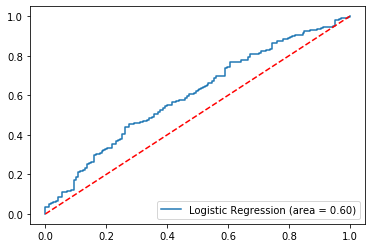

In [28]:
#ROC-AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,  pred_proba[:,1])
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower right")

Logistic: F1=0.817 PR AUC=0.767
Average precision-recall score: 0.77


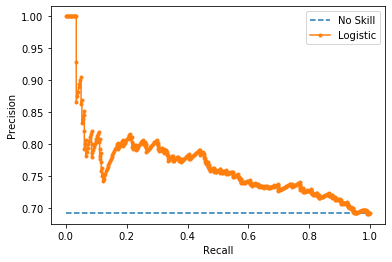

In [51]:
#PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_proba[:,1])
lr_f1= f1_score(y_test, y_pred)
lr_auc = auc(lr_recall, lr_precision)
print('Logistic: F1=%.3f PR AUC=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test['Loan_Status']==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_test, pred_proba[:,1])
print('Average precision-recall score: {0:0.2f}'.format(
      avg_precision))

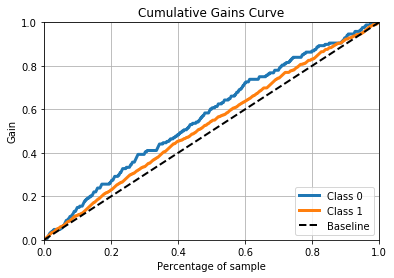

In [44]:
import scikitplot as skplt 
skplt.metrics.plot_cumulative_gain(y_test, pred_proba)

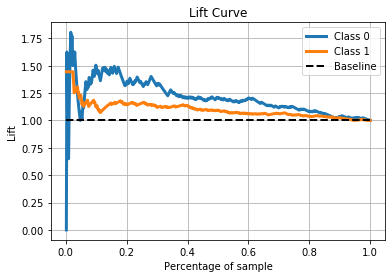

In [41]:
skplt.metrics.plot_lift_curve(y_test, pred_proba)
plt.legend(loc='best')

In [42]:
y_test.shape

(546, 1)